In [1]:
import numpy
import matplotlib.pyplot as plt
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.recurrent import GRU
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import pandas
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import aux_func as f


Using Theano backend.


In [2]:
feature_dim = 1
look_back = 0
data_file = 'abelha-only-press.csv'
data_use_percent = 1

# fix random seed for reproducibility
#numpy.random.seed(7)

# load the dataset
dataframe = pandas.read_csv(data_file, engine='python')

def create_window(data, feature_name, past_times =[]):
    index = [feature_name]
    dataframe = data.copy()
    for i in past_times:
        dataframe[feature_name+'_t-'+str(i)] = dataframe[feature_name].shift(periods=i, freq=None, axis=0)
        index.append(feature_name+'_t-'+str(i))
    index.append('act')
    
    return dataframe.tail(-max(window)).reindex_axis(index,axis=1)

def normalize(dataframe):
    old_act = dataframe['act']
    dataframe2 = (dataframe - dataframe.min())/(dataframe.max() - dataframe.min())
    dataframe2['act'] = old_act
    return dataframe2

def train_predict(dataframe, times = 1):
    dataset2 = dataframe.values
    #resizing dataset len for faster tests 
    dataset2 = dataset2[:int(len(dataset2)*data_use_percent)]
    dataset2 = dataset2.astype('float32')

    # split into train and test sets
    train_size = int(len(dataset2) * 0.70)
    test_size = len(dataset2) - train_size
    train, test = dataset2[0:train_size,:], dataset2[train_size:len(dataset2),:]

    

    trainX, trainY = f.create_dataset(train, feature_dim, look_back)
    testX, testY = f.create_dataset(test, feature_dim, look_back)

    # reshape input to be [samples, time steps, features]
    trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
    testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))


    for i in range(times):
        model = f.baseline_model(feature_dim + look_back)
        model.fit(trainX, trainY, nb_epoch=500, verbose=0)

        trainPredict = model.predict(trainX)
        testPredict = model.predict(testX)
        trainScore = math.sqrt(mean_squared_error(trainY, trainPredict))
        print(str(i)+' Train Score: %.6f RMSE' % (trainScore))
        testScore = math.sqrt(mean_squared_error(testY, testPredict))
        print(str(i)+' Test Score: %.6f RMSE' % (testScore))

    f.g_plot(dataset2,trainPredict, testPredict, feature_dim, look_back)
    

dataframe.head(8)

,press,act
0,1010.1,0.023
1,1009.5,0.028
2,1009.6,0.092
3,1009.6,0.161
4,1009.9,0.276
5,1010.8,0.618
6,1011.3,1.060
7,1011.3,1.240


In [3]:
window = [3]
dataframe1 = normalize(dataframe)
feature_dim = 1
dataframe1

,press,act
0,0.585714,0.023
1,0.500000,0.028
2,0.514286,0.092
3,0.514286,0.161
4,0.557143,0.276
5,0.685714,0.618
6,0.757143,1.060
7,0.757143,1.240
8,0.700000,1.217
9,0.642857,1.346


0 Train Score: 0.515194 RMSE
0 Test Score: 0.529448 RMSE
1 Train Score: 0.518624 RMSE
1 Test Score: 0.537960 RMSE
2 Train Score: 0.519237 RMSE
2 Test Score: 0.539361 RMSE
3 Train Score: 0.517788 RMSE
3 Test Score: 0.536112 RMSE
4 Train Score: 0.517138 RMSE
4 Test Score: 0.534103 RMSE
5 Train Score: 0.516281 RMSE
5 Test Score: 0.532290 RMSE
6 Train Score: 0.515120 RMSE
6 Test Score: 0.529974 RMSE
7 Train Score: 0.518076 RMSE
7 Test Score: 0.536904 RMSE
8 Train Score: 0.518473 RMSE
8 Test Score: 0.537846 RMSE
9 Train Score: 0.518071 RMSE
9 Test Score: 0.535950 RMSE


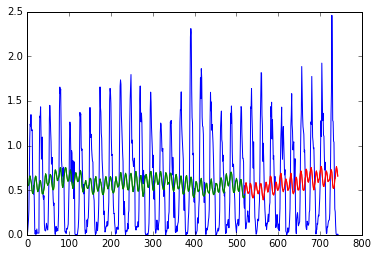

In [4]:
train_predict(dataframe1,10)

In [193]:
window = [3]
dataframe1 = normalize(dataframe)
dataframe1 = create_window(dataframe1, "press", window)
feature_dim = len(window) + 1
dataframe1

,press,press_t-3,act
3,0.514286,0.585714,0.161
4,0.557143,0.500000,0.276
5,0.685714,0.514286,0.618
6,0.757143,0.514286,1.060
7,0.757143,0.557143,1.240
8,0.700000,0.685714,1.217
9,0.642857,0.757143,1.346
10,0.571429,0.757143,1.207
11,0.428571,0.700000,1.166
12,0.328571,0.642857,1.175


0 Train Score: 0.516875 RMSE
0 Test Score: 0.530099 RMSE
1 Train Score: 0.517281 RMSE
1 Test Score: 0.531184 RMSE
2 Train Score: 0.516560 RMSE
2 Test Score: 0.533462 RMSE
3 Train Score: 0.515388 RMSE
3 Test Score: 0.531474 RMSE
4 Train Score: 0.516866 RMSE
4 Test Score: 0.530110 RMSE
5 Train Score: 0.515084 RMSE
5 Test Score: 0.531349 RMSE
6 Train Score: 0.512824 RMSE
6 Test Score: 0.533044 RMSE
7 Train Score: 0.516878 RMSE
7 Test Score: 0.530345 RMSE
8 Train Score: 0.517392 RMSE
8 Test Score: 0.531630 RMSE
9 Train Score: 0.517159 RMSE
9 Test Score: 0.530401 RMSE


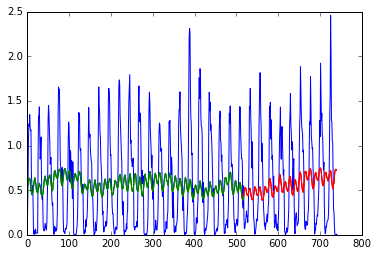

In [194]:
train_predict(dataframe1,10)

In [195]:
window = [3,6]
dataframe1 = normalize(dataframe)
dataframe1 = create_window(dataframe1, "press", window)
feature_dim = len(window) + 1
dataframe1

,press,press_t-3,press_t-6,act
6,0.757143,0.514286,0.585714,1.060
7,0.757143,0.557143,0.500000,1.240
8,0.700000,0.685714,0.514286,1.217
9,0.642857,0.757143,0.514286,1.346
10,0.571429,0.757143,0.557143,1.207
11,0.428571,0.700000,0.685714,1.166
12,0.328571,0.642857,0.757143,1.175
13,0.271429,0.571429,0.757143,0.691
14,0.271429,0.428571,0.700000,0.581
15,0.342857,0.328571,0.642857,0.456


0 Train Score: 0.516909 RMSE
0 Test Score: 0.531684 RMSE
1 Train Score: 0.489422 RMSE
1 Test Score: 0.540801 RMSE
2 Train Score: 0.515955 RMSE
2 Test Score: 0.534144 RMSE
3 Train Score: 0.484822 RMSE
3 Test Score: 0.536357 RMSE
4 Train Score: 0.507740 RMSE
4 Test Score: 0.530577 RMSE
5 Train Score: 0.506366 RMSE
5 Test Score: 0.536161 RMSE
6 Train Score: 0.516149 RMSE
6 Test Score: 0.531089 RMSE
7 Train Score: 0.476098 RMSE
7 Test Score: 0.531182 RMSE
8 Train Score: 0.515383 RMSE
8 Test Score: 0.532916 RMSE
9 Train Score: 0.515987 RMSE
9 Test Score: 0.529945 RMSE


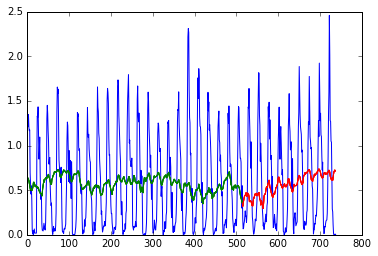

In [196]:
train_predict(dataframe1,10)

In [197]:
window = [3,6,12]
dataframe1 = normalize(dataframe)
dataframe1 = create_window(dataframe1, "press", window)
feature_dim = len(window) + 1
dataframe1

,press,press_t-3,press_t-6,press_t-12,act
12,0.328571,0.642857,0.757143,0.585714,1.175
13,0.271429,0.571429,0.757143,0.500000,0.691
14,0.271429,0.428571,0.700000,0.514286,0.581
15,0.342857,0.328571,0.642857,0.514286,0.456
16,0.442857,0.271429,0.571429,0.557143,0.548
17,0.514286,0.271429,0.428571,0.685714,0.382
18,0.642857,0.342857,0.328571,0.757143,0.060
19,0.714286,0.442857,0.271429,0.757143,0.009
20,0.757143,0.514286,0.271429,0.700000,0.046
21,0.742857,0.642857,0.342857,0.642857,0.005


0 Train Score: 0.449874 RMSE
0 Test Score: 0.492707 RMSE
1 Train Score: 0.504165 RMSE
1 Test Score: 0.532853 RMSE
2 Train Score: 0.449089 RMSE
2 Test Score: 0.483583 RMSE
3 Train Score: 0.482511 RMSE
3 Test Score: 0.539757 RMSE
4 Train Score: 0.482407 RMSE
4 Test Score: 0.516837 RMSE
5 Train Score: 0.445009 RMSE
5 Test Score: 0.490444 RMSE
6 Train Score: 0.464478 RMSE
6 Test Score: 0.514224 RMSE
7 Train Score: 0.493637 RMSE
7 Test Score: 0.529469 RMSE
8 Train Score: 0.481935 RMSE
8 Test Score: 0.521134 RMSE
9 Train Score: 0.449638 RMSE
9 Test Score: 0.484057 RMSE


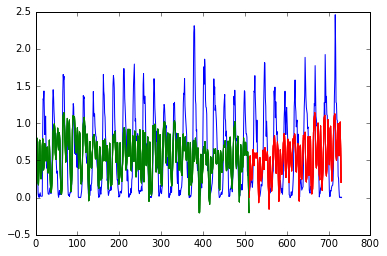

In [198]:
train_predict(dataframe1,10)

In [199]:
window = [3,6,12,24]
dataframe1 = normalize(dataframe)
dataframe1 = create_window(dataframe1, "press", window)
feature_dim = len(window) + 1
dataframe1

,press,press_t-3,press_t-6,press_t-12,press_t-24,act
24,0.414286,0.742857,0.642857,0.328571,0.585714,0.019
25,0.328571,0.628571,0.714286,0.271429,0.500000,0.019
26,0.342857,0.514286,0.757143,0.271429,0.514286,0.019
27,0.385714,0.414286,0.742857,0.342857,0.514286,0.019
28,0.428571,0.328571,0.628571,0.442857,0.557143,0.019
29,0.542857,0.342857,0.514286,0.514286,0.685714,0.876
30,0.600000,0.385714,0.414286,0.642857,0.757143,1.329
31,0.642857,0.428571,0.328571,0.714286,0.757143,1.314
32,0.628571,0.542857,0.342857,0.757143,0.700000,1.433
33,0.542857,0.600000,0.385714,0.742857,0.642857,1.114


0 Train Score: 0.472315 RMSE
0 Test Score: 0.515767 RMSE
1 Train Score: 0.438863 RMSE
1 Test Score: 0.479432 RMSE
2 Train Score: 0.461755 RMSE
2 Test Score: 0.507780 RMSE
3 Train Score: 0.463801 RMSE
3 Test Score: 0.510639 RMSE
4 Train Score: 0.456399 RMSE
4 Test Score: 0.521054 RMSE
5 Train Score: 0.492577 RMSE
5 Test Score: 0.525661 RMSE
6 Train Score: 0.454508 RMSE
6 Test Score: 0.495839 RMSE
7 Train Score: 0.473780 RMSE
7 Test Score: 0.527837 RMSE
8 Train Score: 0.501524 RMSE
8 Test Score: 0.542438 RMSE
9 Train Score: 0.475563 RMSE
9 Test Score: 0.527703 RMSE


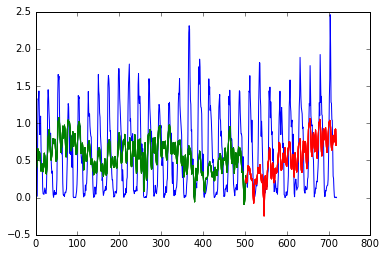

In [200]:
train_predict(dataframe1,10)